In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from pandas.plotting import parallel_coordinates
#import geopandas as gpd
#import geoplot as gplt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline

In [82]:
headings = ["age", "workclass", "fnlwgt", "education", "education-num", "marital_status", "occupation", \
            "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country",\
            "salary-range"]
df = pd.read_csv("../data/adult.data", names=headings)

df['salary-range'] = df['salary-range'].apply(lambda e: e.strip())
df['native-country'] = df['native-country'].apply(lambda e: e.strip())

df['one'] = 1

df['salary-range-bool'] = df['salary-range'] == ">50K"

df['salary-range-int'] = df['salary-range-bool'].apply(lambda x: 1 if x else 0)

df.head()

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-range,one,salary-range-bool,salary-range-int
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,False,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,False,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,False,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,False,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,False,0


In [83]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,one,salary-range-int
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.0,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,1.0,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.0,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,1.0,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,1.0,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,1.0,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,1.0,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.0,1.000000


In [84]:
sns.set(font_scale = 1.2)
sns.set_style("darkgrid")
plt.figure(figsize=(15,7))



<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

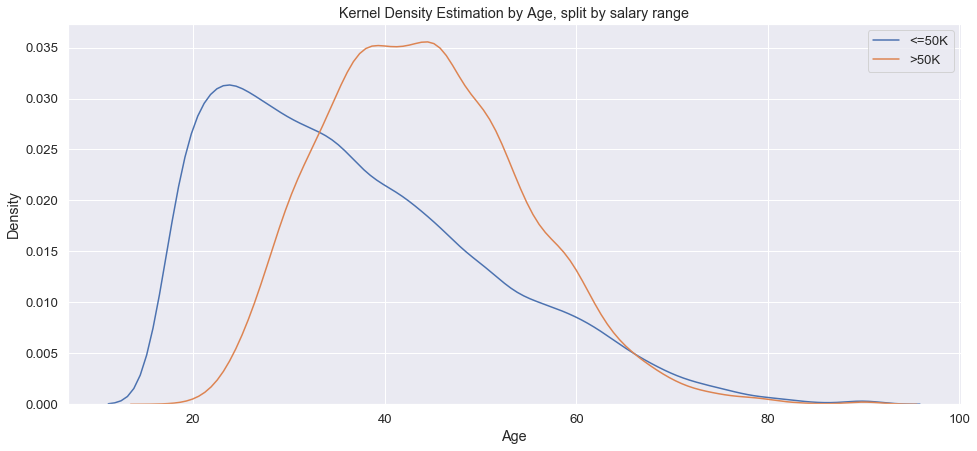

In [85]:
plt.figure(figsize=(16, 7))


ax = sns.kdeplot(df[df['salary-range'] == '<=50K']['age'])
sns.kdeplot(df[df['salary-range'] == '>50K']['age'])

ax.set_title('Kernel Density Estimation by Age, split by salary range')
ax.set_ylabel('Density')
ax.set_xlabel('Age')
plt.legend(loc='upper right', labels=['<=50K', '>50K'])

# plt.show()
plt.savefig("images/kde_age_split", bbox_inches='tight')

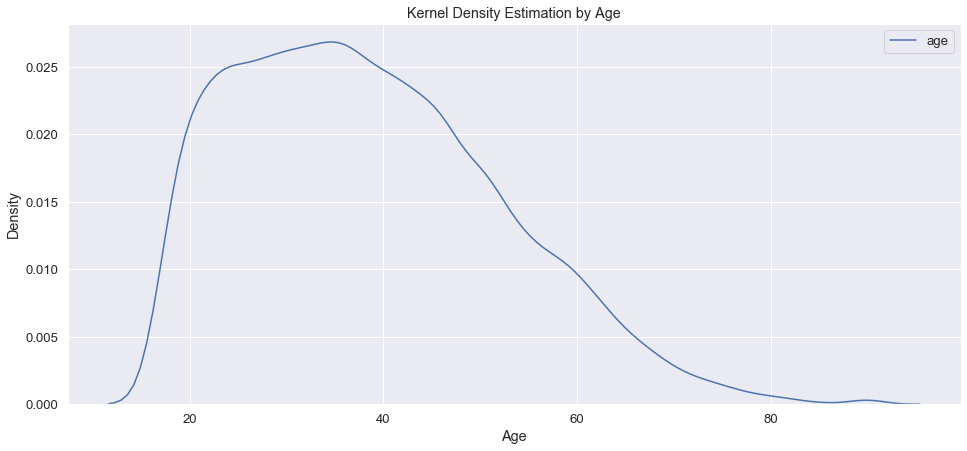

In [86]:
plt.figure(figsize=(16, 7))


ax = sns.kdeplot(df['age'])

ax.set_title('Kernel Density Estimation by Age')
ax.set_ylabel('Density')
ax.set_xlabel('Age')

# plt.show()
plt.savefig("images/kde_age_all", bbox_inches='tight')

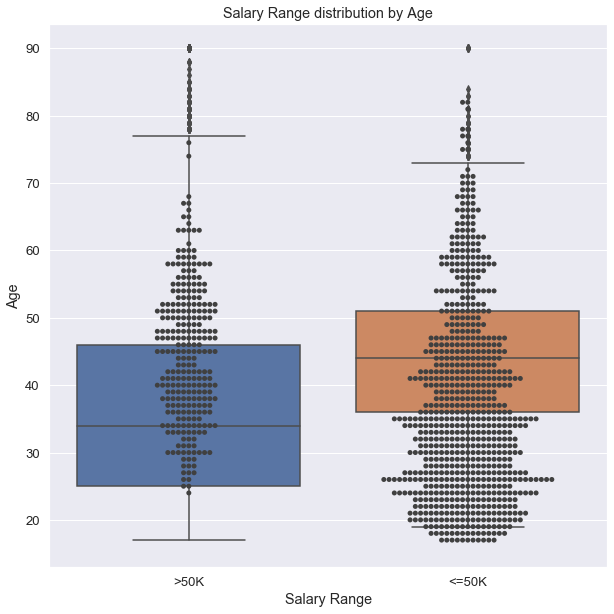

In [87]:
plt.figure(figsize=(10, 10))

ax = sns.boxplot(x="salary-range", y="age", data=df)
ax = sns.swarmplot(x="salary-range", y="age", data=df.sample(n=1000), color=".25")

ax.set_title('Salary Range distribution by Age')
ax.set_ylabel('Age')
ax.set_xlabel('Salary Range')

plt.savefig("images/salary_range_box_and_whisker", bbox_inches='tight')

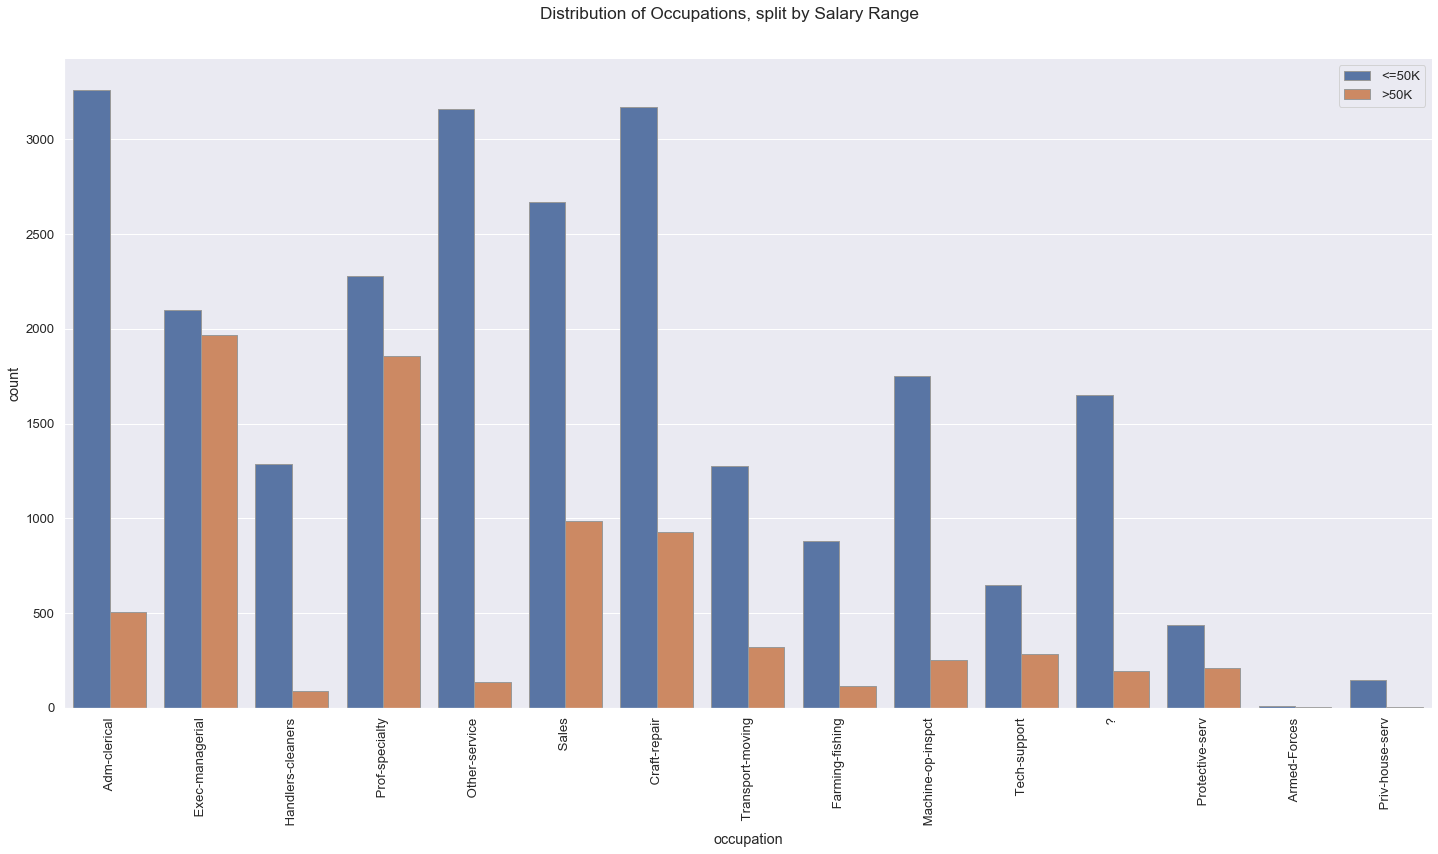

In [88]:
g = sns.catplot(x="occupation", kind="count", edgecolor=".6", hue="salary-range",
            data=df, height=10, aspect=2, legend=False);
g.set_xticklabels(rotation=90)
g.fig.suptitle("Distribution of Occupations, split by Salary Range", y=1.05)
plt.legend(loc='upper right')
# plt.show()
plt.savefig("images/occupation_vs_salary_barchart", bbox_inches='tight')

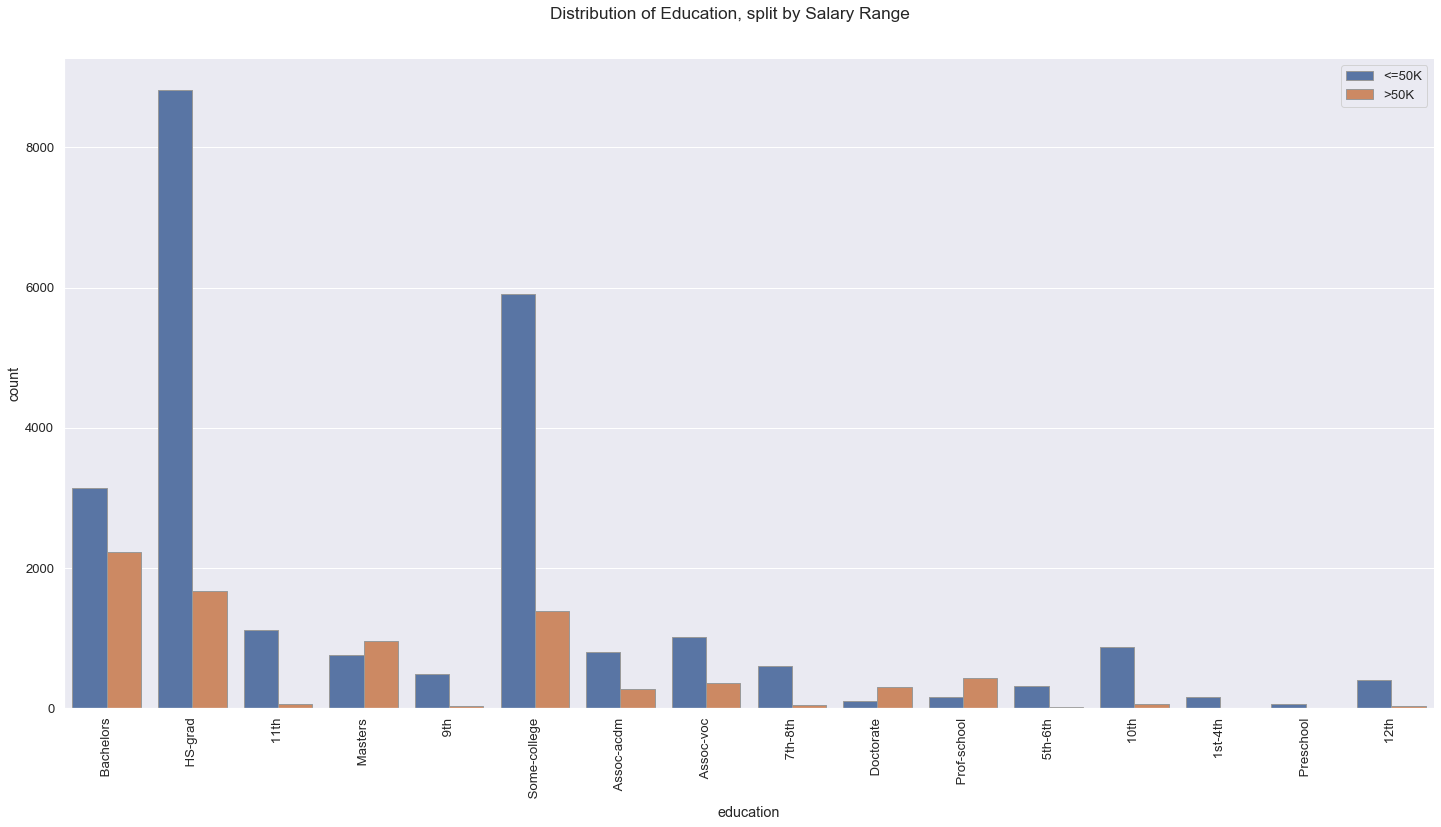

In [89]:
g = sns.catplot(x="education", kind="count", edgecolor=".6", hue="salary-range",
            data=df, height=10, aspect=2, legend=False);
g.set_xticklabels(rotation=90)
g.fig.suptitle("Distribution of Education, split by Salary Range", y=1.05)
plt.legend(loc='upper right')
# plt.show()
plt.savefig("images/education_vs_salary_barchart", bbox_inches='tight')

In [90]:
# s = df[["education-num", "education"]]
s = df["education-num"].astype(str) + df["education"]
sorted(list(s.unique()))


['1 Preschool',
 '10 Some-college',
 '11 Assoc-voc',
 '12 Assoc-acdm',
 '13 Bachelors',
 '14 Masters',
 '15 Prof-school',
 '16 Doctorate',
 '2 1st-4th',
 '3 5th-6th',
 '4 7th-8th',
 '5 9th',
 '6 10th',
 '7 11th',
 '8 12th',
 '9 HS-grad']

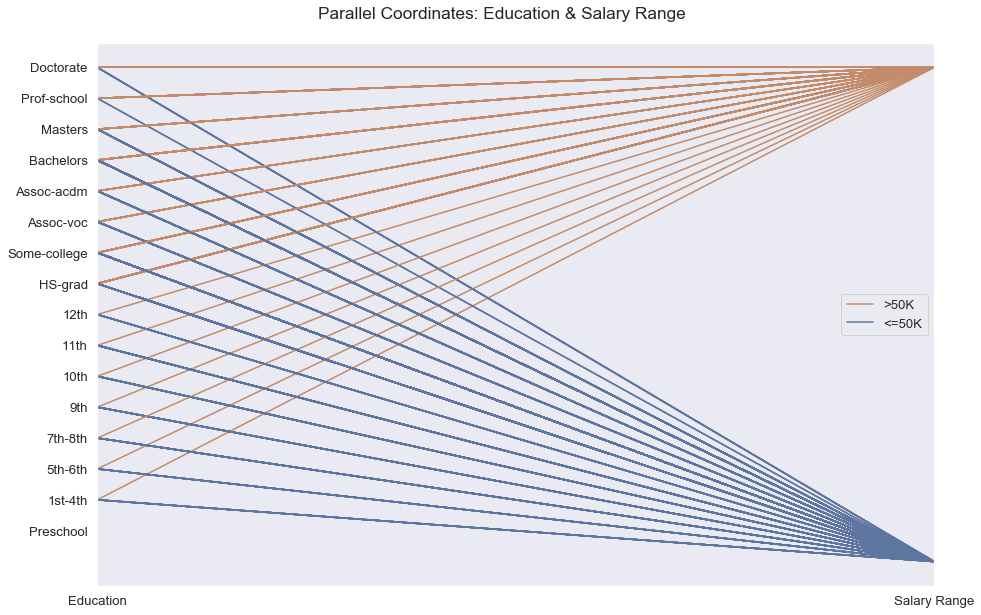

In [91]:
import matplotlib.ticker as ticker
from matplotlib.colors import ListedColormap


fig = plt.figure(figsize=(15,10))

pc_df = df[['education-num', 'salary-range-int', 'salary-range']]

def normalize(x):
    try:
        x = x/x.max()
        return x
    except:
        return x

pc_df_norm = pc_df.apply(normalize, axis=0)

colormap = ListedColormap([[195./255, 139./255, 105./255, 1.0],
                          [94./255, 117./255, 160./255, 1.0],])
            

title = fig.suptitle("Parallel Coordinates: Education & Salary Range", y=0.93)
g = parallel_coordinates(pc_df_norm.sample(1000, random_state=3), 'salary-range', 
                         colormap=colormap)

handles, labels = g.get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))

labels = (labels[1], labels[0])
handles = (handles[1], handles[0])

plt.legend(handles, labels, loc='right')
g.set(xticklabels=["Education", "Salary Range"])

yticklabels = ['',
 'Preschool',
 '1st-4th',
 '5th-6th',
 '7th-8th',
 '9th',
 '10th',
 '11th',
 '12th',
 'HS-grad',
 'Some-college',
 'Assoc-voc',
 'Assoc-acdm',
 'Bachelors',
 'Masters',
 'Prof-school',
 'Doctorate']

plt.yticks(np.arange(0, 1 + 1/16, 1/16))

g.set(yticklabels=yticklabels)

# plt.show()
plt.savefig("images/parallel_coordinates", bbox_inches='tight')

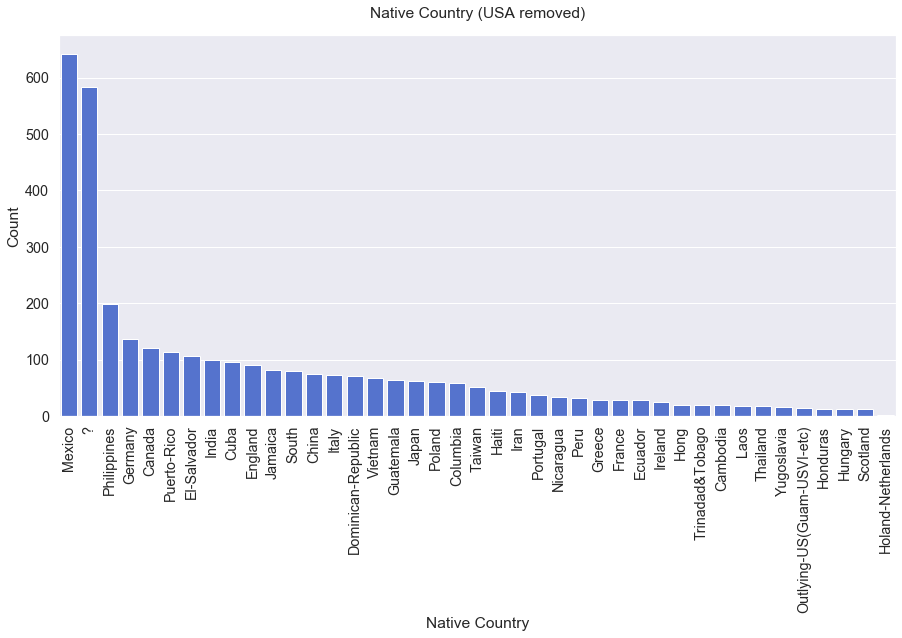

In [92]:
sns.set(font_scale = 1.3)
sns.set_style("darkgrid")
plt.figure(figsize=(15,7))

plt.xticks(rotation=90)

g = sns.barplot(x=df['native-country'][df['native-country'] != "United-States"].value_counts().index,
            y=df['native-country'][df['native-country'] != "United-States"].value_counts().values, color='royalblue')
plt.title("Native Country (USA removed)", y=1.03)

g.set_ylabel('Count')
g.set_xlabel('Native Country')

# plt.show()
plt.savefig("images/native_country_barchart", bbox_inches='tight')

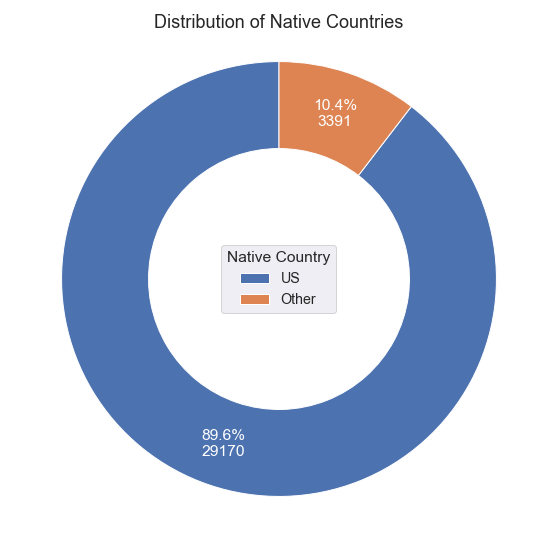

In [93]:
us_count = df[df['native-country'] == "United-States"]['native-country'].count()
others_count = df['native-country'].count() - us_count

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

data = [us_count, others_count]
classes = ["US", "Other"]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d}".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="white"), 
                                  wedgeprops=dict(width=0.4), startangle=90,
                                  pctdistance=0.8)

ax.legend(wedges, classes,
          title="Native Country",
          loc="center left",
          bbox_to_anchor=(0.38, 0, 0.5, 1))

ax.set_title("Distribution of Native Countries", fontsize=18, y=0.95)

# plt.show()
plt.savefig("images/distribution_of_native_countries_donut", bbox_inches='tight')

In [94]:
# country_group = df.groupby('native-country').sum()
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# world_filtered = world.merge(country_group, how='inner', left_on=['name'], right_on=['native-country'])
# world_filtered2 = world_filtered[~world_filtered['name'].isin(["United-States", "Mexico"])]
# fig, ax = plt.subplots(1, 1, figsize=(30, 30), )

# plt.ylim(-60, 90)
# world.plot(edgecolor='powderblue', color='white', ax=ax)

# sns.set(font_scale = 2)


# divider = make_axes_locatable(ax)

# cax = divider.append_axes("right", size="8%", pad=0.5)

# plt.ylim(-60, 90)
# world_filtered2.plot(column='one', ax=ax, cax=cax, cmap='summer_r', 
#                      legend=True, legend_kwds={'label': "Count"})

# ax.get_xaxis().set_ticks([])
# ax.get_yaxis().set_ticks([])

# ax.set_title("Native Country of respondents (not including USA, Mexico or Unknown)", fontdict={'fontsize': 32}, 
#              pad=20)
# # ax.set_ylabel("Latitude (deg)", fontdict={'fontsize': 26}, labelpad=20)
# # ax.set_xlabel("Longitude (deg)", fontdict={'fontsize': 26}, labelpad=20)

# # plt.show()

# plt.savefig("images/native_country_geoplot", bbox_inches='tight')

In [95]:
#     values_array = df['relationship'].unique()
#     fig, axes = plt.subplots(ncols=1, nrows=len(values_array), figsize=(5,5 * len(values_array)))

#     for i in range(0, len(values_array)):
#         sub_df = df[df['relationship'] == values_array[i]]
#         axes[i].pie([len(sub_df[sub_df["salary-range"] == 0].index), len(sub_df[sub_df["salary-range"] == 1].index)], \
#                 labels=["<=50K", ">50K"], autopct='%1.0f%%')
#         axes[i].set_title(values_array[i])
        
        
#     plt.show()

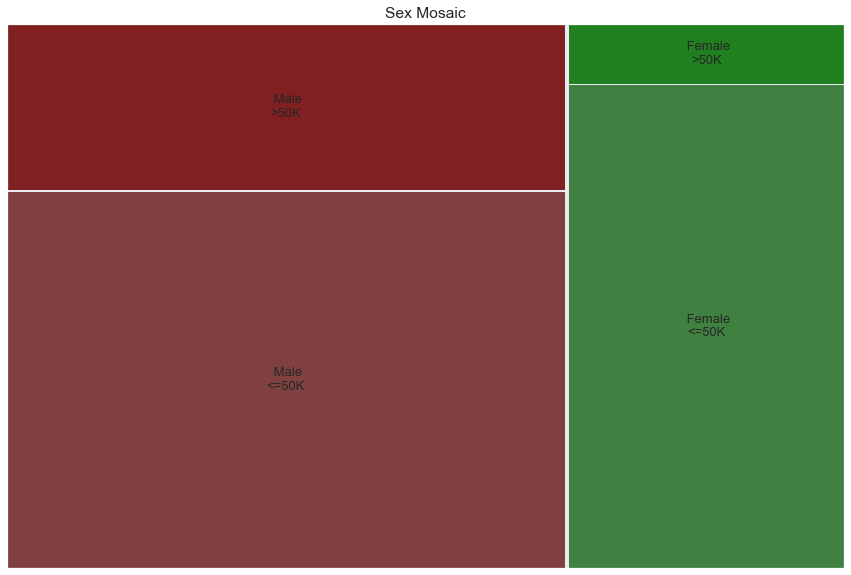

In [96]:
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,10))
mosaic(df, ['sex', 'salary-range'], ax=axes, axes_label=False)
plt.title("Sex Mosaic")
plt.show()